# Palmer Penguins Dataset Analysis

****

![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

***

# Purpose

This notebook aims to explore and analyze the Palmer Penguins dataset to uncover insights about the relationships between the physical features of penguins and their species. Through this analysis, we will:

- Load and inspect the dataset
- Perform exploratory data analysis (EDA) to understand the distribution of various variables
- Visualize key relationships between different features
- Analyze the differences between penguin species in terms of physical attributes

### Dataset Overview

The dataset includes the following columns:
- species: The species of the penguin (Adelie, Chinstrap, Gentoo)
- island: The island where the penguin was observed
- bill_length_mm: The length of the penguin's bill in millimeters
- bill_depth_mm: The depth of the penguin's bill in millimeters
- flipper_length_mm: The length of the penguin's flipper in millimeters
- body_mass_g: The body mass of the penguin in grams
- sex: The sex of the penguin (Male or Female)

By analyzing this dataset, we will explore how these variables are distributed across species and how physical characteristics like bill length, flipper length, and body mass differ between penguin species.

***

### Importing Libraries

In [32]:
# Data frames 
import pandas as pd
#Numerical arrays and random numbers
import numpy as np 
#Plot
import matplotlib.pyplot as plt
#statistical data visualization
import seaborn as sns
# Importing scikit-learn (sklearn) for machine learning tasks
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

****

### Loading Data

In [4]:
# Load the penguins dataset.

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [5]:
# Let's have an initial look. 
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
# Creating values to fill the rows with no values associated. 
dataset = df.fillna(method ='ffill')
dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
# Description of the data
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.00000,344.000000,344.000000,344.000000
mean,43.92093,17.143605,200.936047,4201.090116
std,5.45003,1.978342,14.042064,802.213531
min,32.10000,13.100000,172.000000,2700.000000
25%,39.27500,15.575000,190.000000,3550.000000
50%,44.45000,17.300000,197.000000,4050.000000
75%,48.50000,18.700000,213.250000,4756.250000
max,59.60000,21.500000,231.000000,6300.000000


***

## Data Analysis and Visualization

The first set of charts gives a general overview to help set the stage and provide some context. These initial visualizations highlight key trends and patterns in the data, giving it a broad understanding of the dataset distribution.

[Text(0.5, 1.0, 'Penguins Species per Island')]

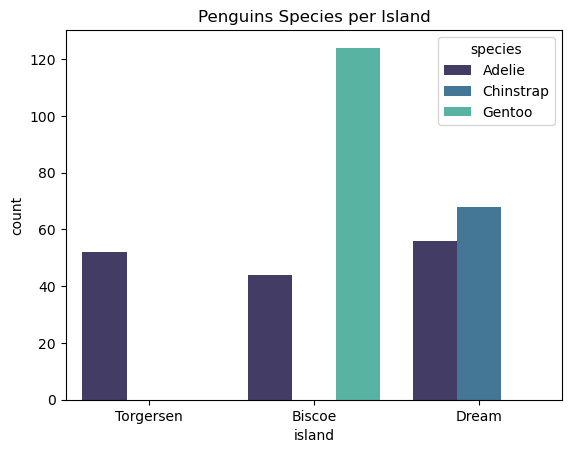

In [8]:
#First let's have a look of the species of penguins across the islands

sns.countplot(data= dataset, x= 'island', hue='species', palette='mako').set(title='Penguins Species per Island')

In [10]:
# Now we are going to explore the body mass of the penguins. This will help us determine the minimum, maximum, and average body weight of the penguins.

bodymass = dataset['body_mass_g'].to_numpy()


Text(0, 0.5, 'count')

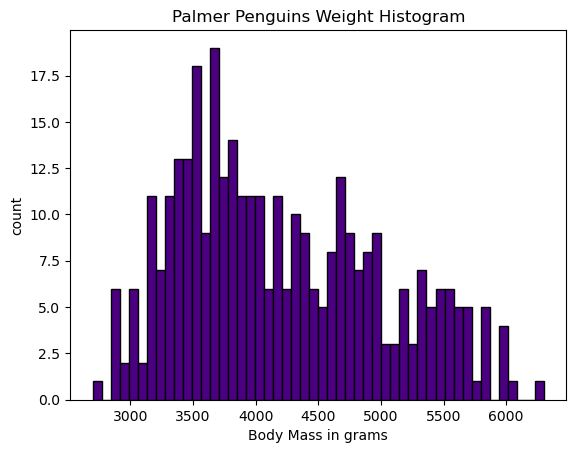

In [11]:
plt.hist(bodymass, bins=50, color='indigo', edgecolor= 'black')
# create title
plt.title('Palmer Penguins Weight Histogram')
# name axis
plt.xlabel('Body Mass in grams') 
plt.ylabel('count')

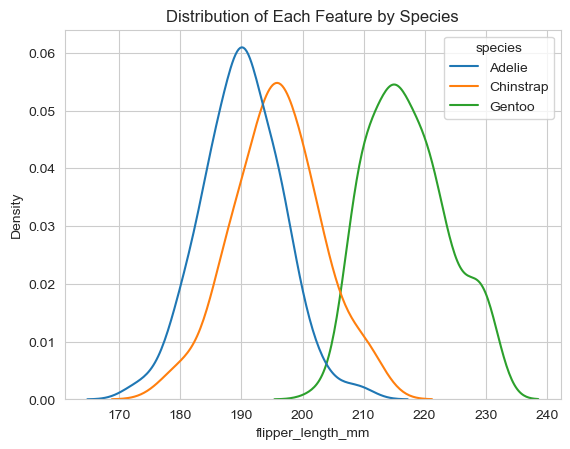

In [37]:
# Let's examine the distributions of individual features across species
sns.kdeplot(data=dataset, x='flipper_length_mm', hue='species', common_norm=False).set(title='Distribution of Each Feature by Species')
plt.show()

In [12]:
# Group means values by species.
dataset.groupby('species').mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Gentoo,47.502419,14.971774,217.161290,5074.798387
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Adelie,38.801316,18.344079,189.986842,3697.697368


In [13]:
# Let's break the mean values down by both island and species.
dataset.groupby(["island","species"]).mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False)

,,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,species,,,,
Biscoe,Gentoo,47.502419,14.971774,217.161290,5074.798387
Dream,Chinstrap,48.833824,18.420588,195.823529,3733.088235
Biscoe,Adelie,38.975000,18.370455,188.795455,3709.659091
Torgersen,Adelie,38.976923,18.421154,191.269231,3697.596154
Dream,Adelie,38.501786,18.251786,189.732143,3688.392857


In [14]:
# let's check the distribution of penguins per species.
print(dataset.groupby('species').size())

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64


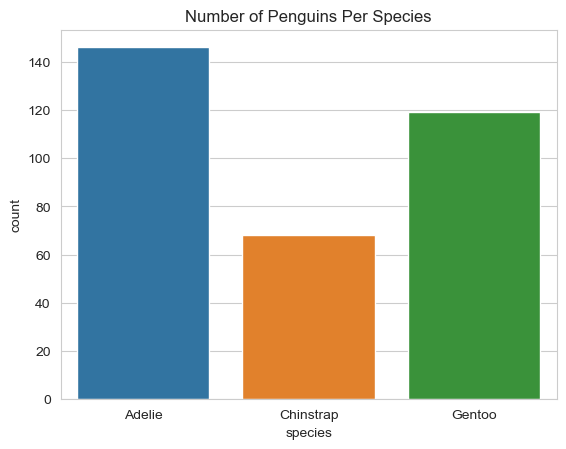

In [40]:
# Visualize the number of samples available for each species
sns.countplot(data=dataset, x='species').set(title= 'Number of Penguins Per Species')
plt.show()

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


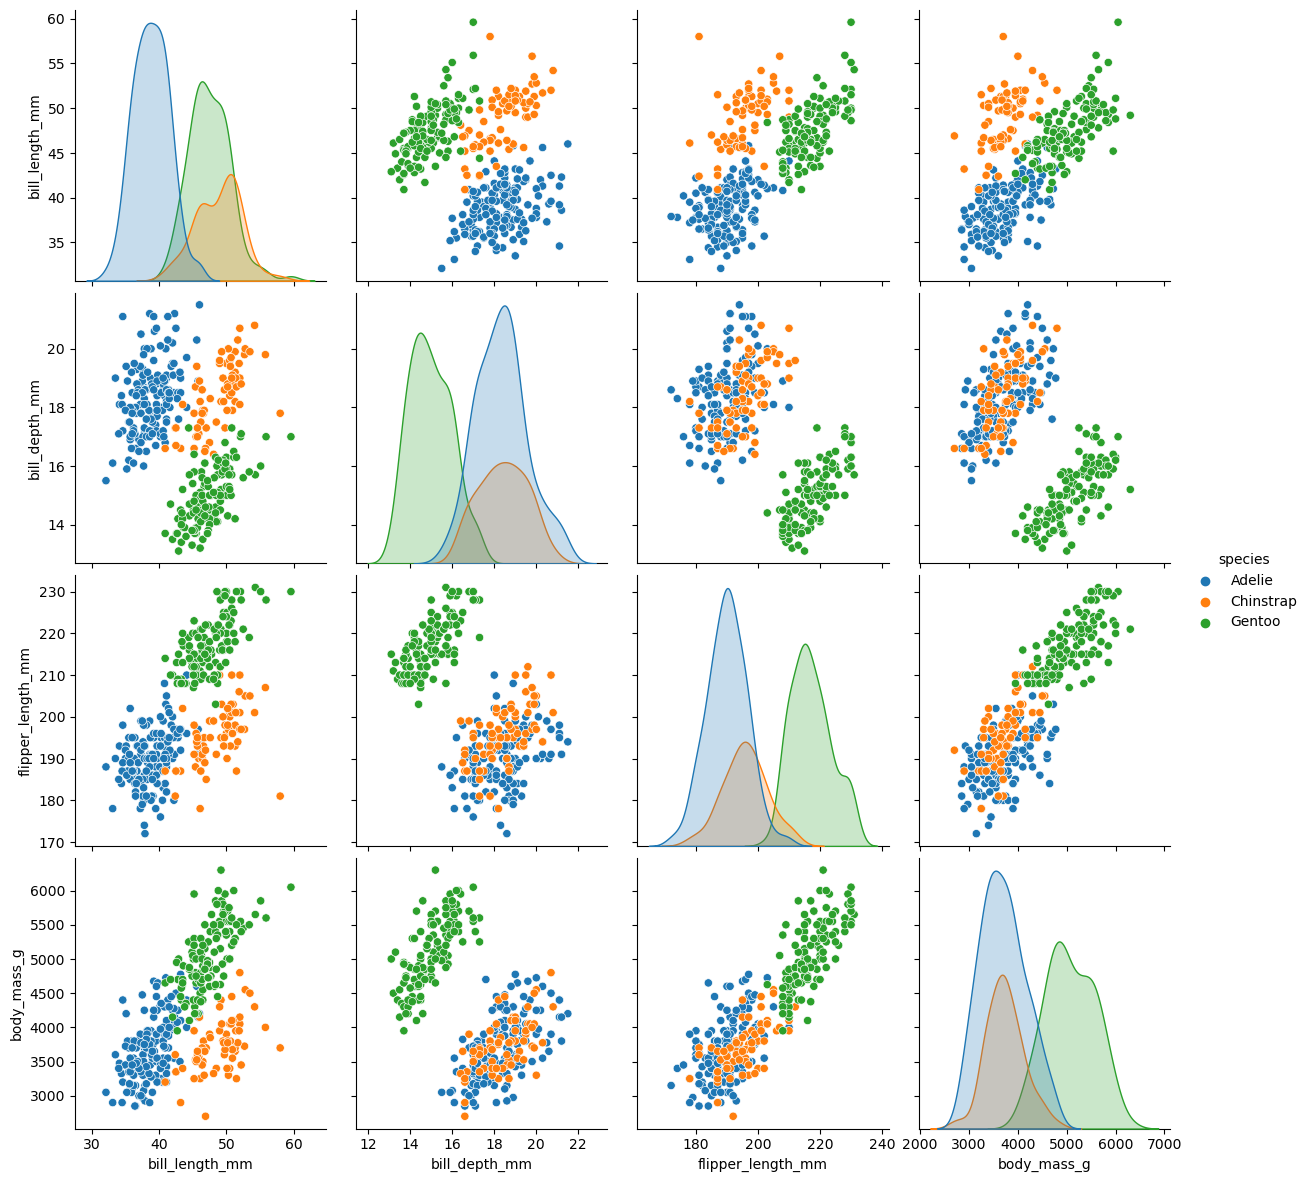

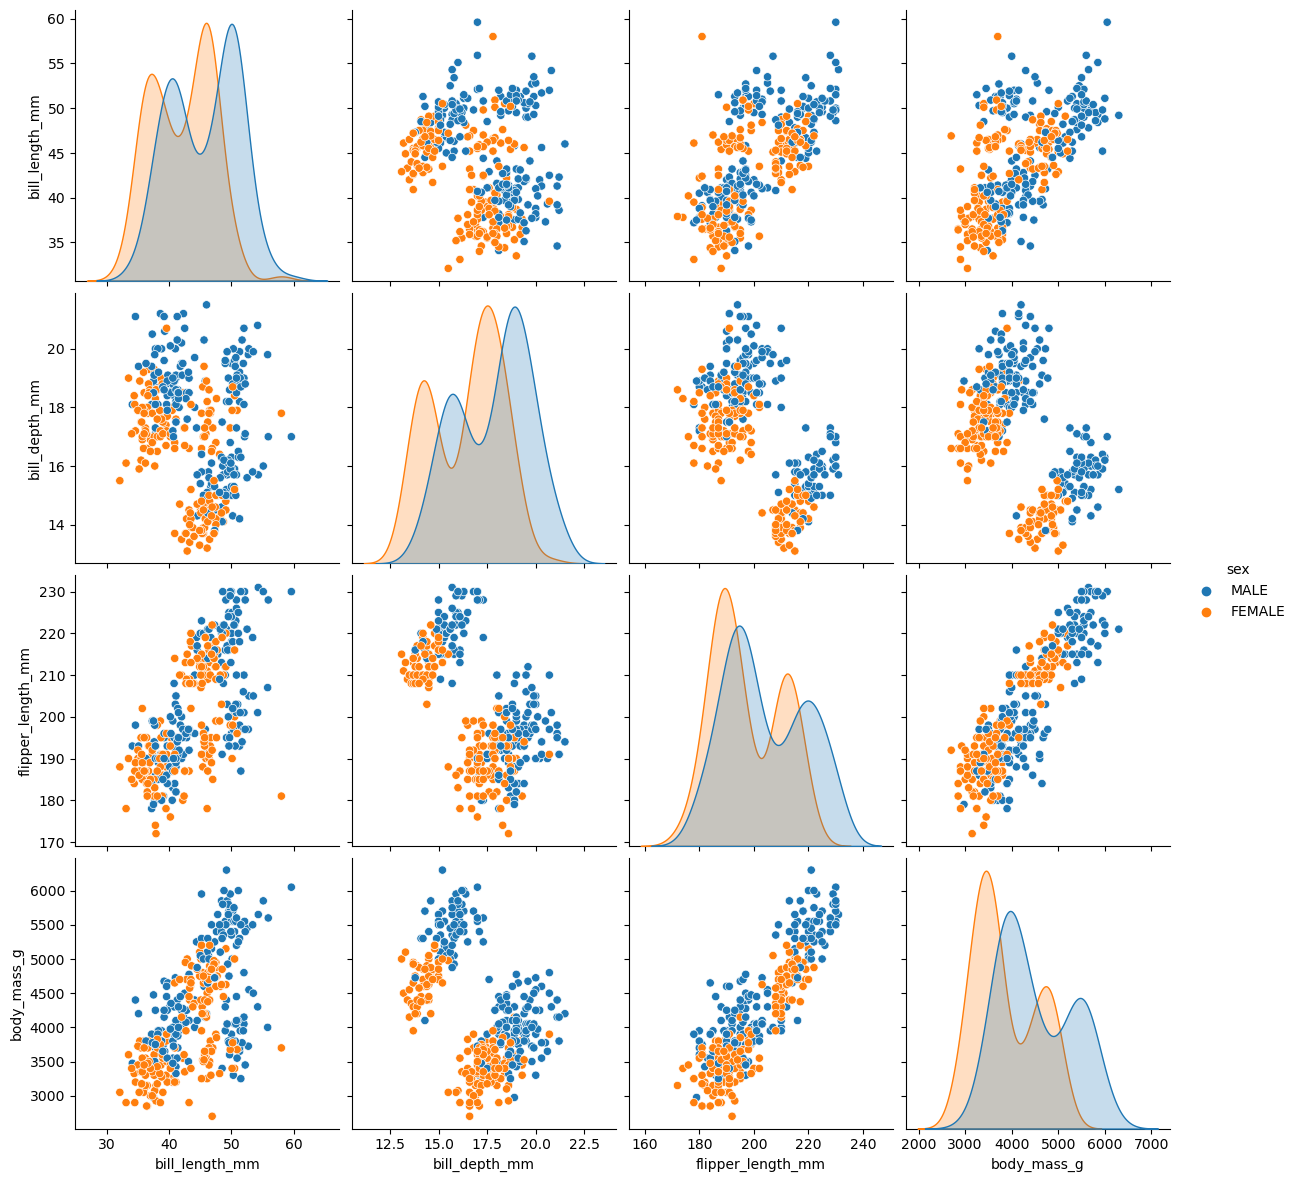

In [15]:
#Now let's analyse caracteristics according to the species. 
sns.pairplot(dataset, hue='species', height=3, diag_kind="kde")    
sns.pairplot(dataset,hue='sex',  height=3) 

![bill](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

### Insights from the Dataset:

The plots above provide the following insights into the penguin species across different islands, their physical characteristics, and gender-based weight differences:

Species Distribution:

- Adelie Penguins are the most widely distributed species, found across all three islands. This suggests they have a broad habitat range and are not limited to specific locations.
- Chinstrap Penguins are exclusive to Biscoe Island, indicating their presence is geographically restricted to this island alone.
- Gentoo Penguins are only found on Dream Island, further emphasizing their limited distribution compared to the other species.

Gender-Based Weight Differences:

- Male penguins are consistently heavier than females across all species. On average, males weigh about 4000 grams.
- Female penguins, in contrast, have an average weight of 3500 grams, making them lighter than their male counterparts.

Physical Characteristics:

- Adelie Penguins have the smallest body dimensions in terms of flipper length, bill depth, and bill length compared to the other species. Despite their smaller size, they are still widely distributed across all three islands.
- Gentoo Penguins have the largest flippers and the heaviest body mass, with an average weight of 5000 grams.
- Chinstrap Penguins have the largest bill length and depth among the three species, although they are not the heaviest or the largest in overall body size.

These insights provide a deeper understanding of how penguin species vary in terms of distribution, gender differences, and physical traits across the islands.

## Exploring Correlations

In [16]:
# Checking if we can find a correlation between penguins flipper length and bodymass
# Defining the value of x axis.
bmass = dataset['body_mass_g'].to_numpy()

# Defining the value of y axis.
flipper = dataset['flipper_length_mm'].to_numpy()


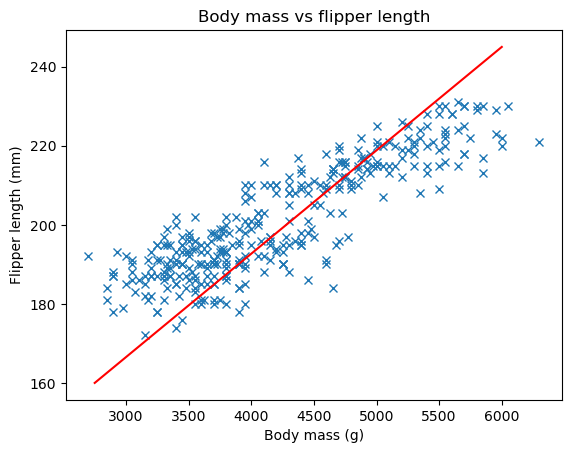

In [17]:
# Create a new figure and set of axes.
fig, ax = plt.subplots()
#create plot
ax.plot(bmass, flipper, 'x')
#create title
ax.set_title('Body mass vs flipper length')
#create axis labels
ax.set_xlabel('Body mass (g)') 
ax.set_ylabel('Flipper length (mm)')

#create red line between depth and length
plt.plot([2750, 6000], [160, 245], color="red")

In [18]:
# Measure the correlation.
np.corrcoef(bmass, flipper)

array([[1.        , 0.87096141],
       [0.87096141, 1.        ]])

A correlation coefficient of 0.87 indicates a strong positive association between flipper length and body mass in the penguin species. This suggests that, generally, as the flipper length increases, so does the body mass, highlighting a potential relationship between these physical characteristics. This correlation could be indicative of larger penguins having more developed flippers, which may be associated with increased body size and overall strength.

In [19]:
# Checking if we can find a correlation between penguins bill depth vs length
# Defining the value of x axis.
blength = dataset['bill_length_mm'].to_numpy()

# Defining the value of y axis.
bdepth = dataset['bill_depth_mm'].to_numpy()


In [20]:
# Measure the correlation.
np.corrcoef(blength, bdepth)

array([[ 1.        , -0.23756313],
       [-0.23756313,  1.        ]])

c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


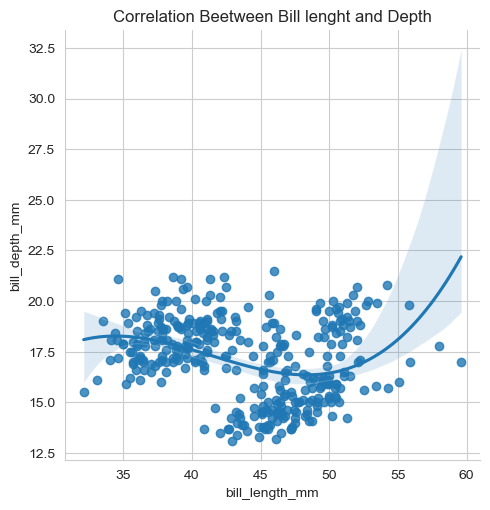

In [21]:
# let's create the correlation plot using seaborn this time
sns.set_style('whitegrid')
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', order=3, data=dataset).set(title='Correlation Beetween Bill lenght and Depth')
plt.show()

A correlation coefficient of -0.23 indicates a week association between penguins bill depth vs length in the penguin species.

### Prediction

In [23]:
# Define features (X) and target (y)
X = dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = dataset['species']

# Convert species names to numerical values for classification
y = y.map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display a classification report for more details
print(classification_report(y_test, y_pred, target_names=['Adelie', 'Chinstrap', 'Gentoo']))

Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        32
   Chinstrap       1.00      1.00      1.00        16
      Gentoo       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



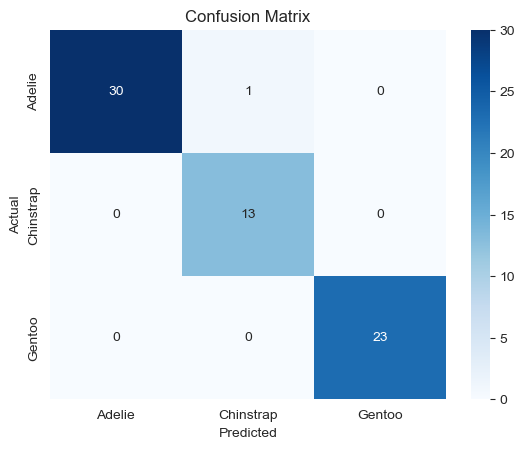

In [34]:
# Load and preprocess the data
X = dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = dataset['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Adelie', 'Chinstrap', 'Gentoo'], yticklabels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix shows that the model is performing excellently, with most predictions being correct. Specifically, 30 Adelie penguins were correctly classified as Adelie, 13 Chinstrap penguins were correctly predicted as Chinstrap, and 13 Gentoo penguins were correctly identified as Gentoo. The only misclassification is one Adelie penguin being predicted as Chinstrap. Overall, the model is highly accurate, with minimal misclassifications and strong performance in distinguishing between the three species.

****

# End